<a href="https://colab.research.google.com/github/Ash100/PD/blob/main/First_Test_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- Configuration ---
CSV_FILE_NAME = "/content/final_design_stats.csv"
OUTPUT_DIR = "plots" # Directory to save plots
DPI = 600 # Dots per inch for saved images

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Loading data from: {CSV_FILE_NAME}")

try:
    df = pd.read_csv(CSV_FILE_NAME)
    print("Data loaded successfully!")
    print(f"Number of designs: {len(df)}")
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())
    print("\nDataframe columns:")
    print(df.columns.tolist())

except FileNotFoundError:
    print(f"Error: {CSV_FILE_NAME} not found. Please upload the file or adjust the path.")
    # Exit or handle the error gracefully if the file is not found
    exit()

Loading data from: /content/final_design_stats.csv
Data loaded successfully!
Number of designs: 72

First 5 rows of the dataframe:
   Rank                   Design Protocol  Length    Seed  Helicity  \
0     1   PhoQ_l43_s535428_mpnn3   3stage      43  535428      0.95   
1     2  PhoQ_l49_s225011_mpnn21   3stage      49  225011      0.95   
2     3   PhoQ_l43_s535428_mpnn4   3stage      43  535428      0.95   
3     4   PhoQ_l36_s105997_mpnn2   3stage      36  105997      0.95   
4     5   PhoQ_l42_s728404_mpnn8   3stage      42  728404      0.95   

  Target_Hotspot                                           Sequence  \
0       A127-147        SEKEKLIEEMVKLNQEMQKNWLNLEKAAEYADKIEELHKKLLE   
1       A127-147  DKEVLLGHVQHHLDYNKKLLEAFKDKDPKVVETLEKNIKLAEELIKELS   
2       A127-147        SEREKLIEEMVKLSQEMWKNWLNLEKAEEYANKIEELHKKLLE   
3       A127-147               MSDEEFIKELEERREKRLKQIEEILSKENPELLKEI   
4       A127-147         DEEKKKLLKEILEEYEELKDVASPFHKPYAKAIAEWAKEQLK   

               


--- Generating Distribution Plots (Histograms) ---


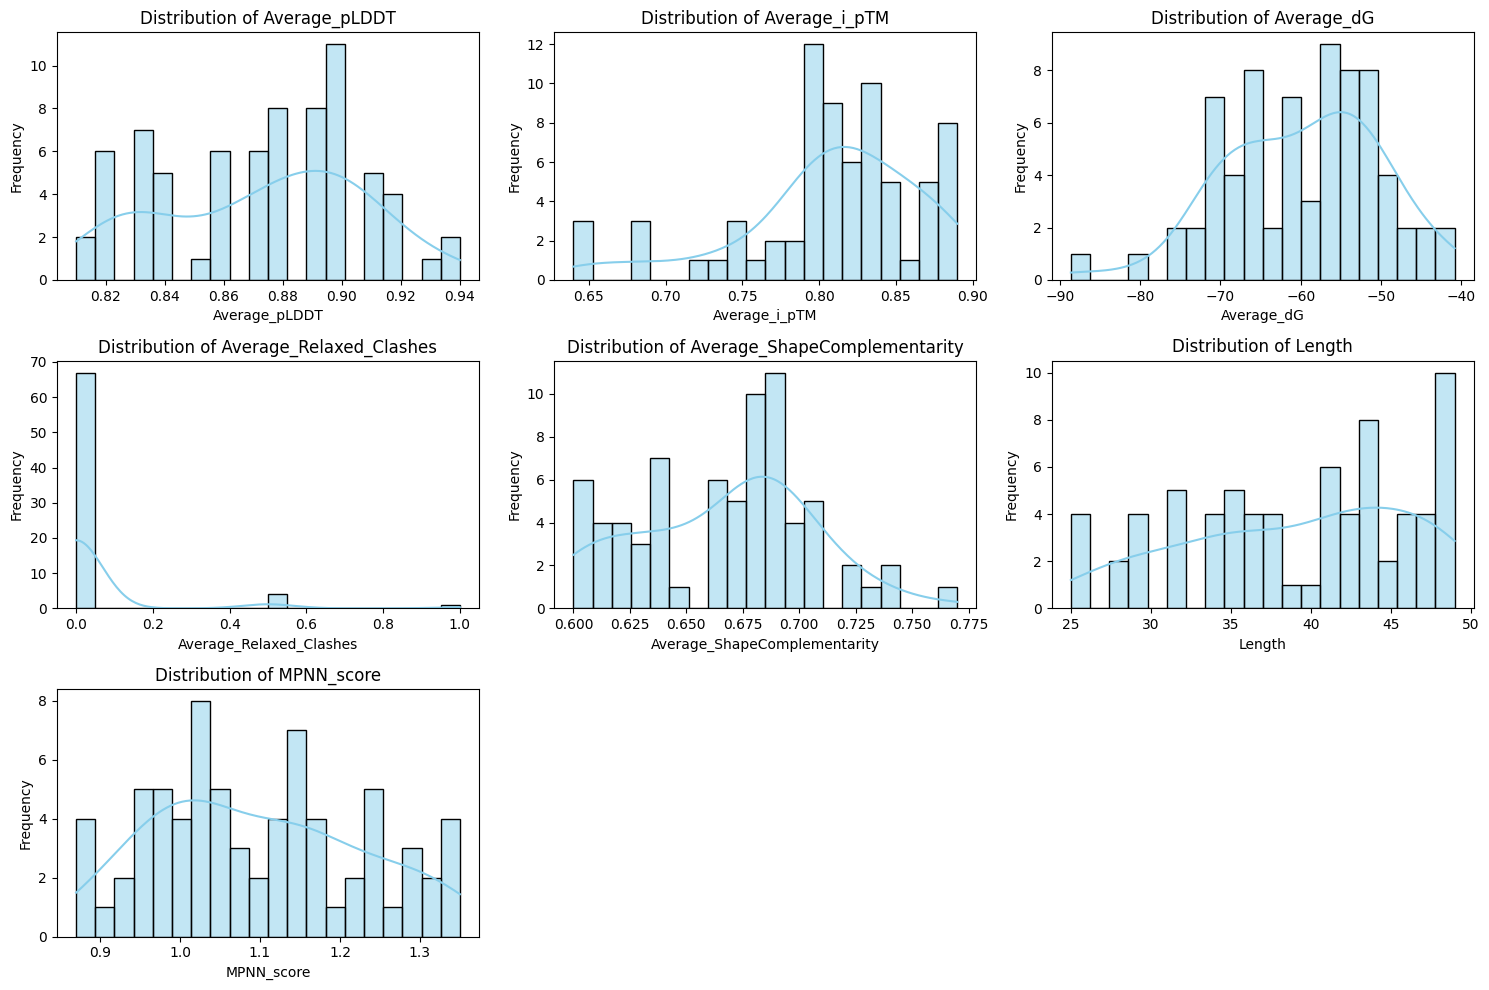

Saved distribution histograms to 'plots/distribution_histograms.png'


In [2]:
# --- Histograms for Key Metrics ---
print("\n--- Generating Distribution Plots (Histograms) ---")

# List of metrics to plot distributions for
distribution_metrics = [
    'Average_pLDDT',
    'Average_i_pTM',
    'Average_dG',
    'Average_Relaxed_Clashes',
    'Average_ShapeComplementarity',
    'Length',
    'MPNN_score'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(distribution_metrics):
    if col in df.columns:
        plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        print(f"Warning: Column '{col}' not found for histogram plot.")

plt.tight_layout()
plot_filename = os.path.join(OUTPUT_DIR, 'distribution_histograms.png')
plt.savefig(plot_filename, dpi=DPI, bbox_inches='tight')
plt.show()
print(f"Saved distribution histograms to '{plot_filename}'")


--- Generating Relationship Plots (Scatter Plots) ---


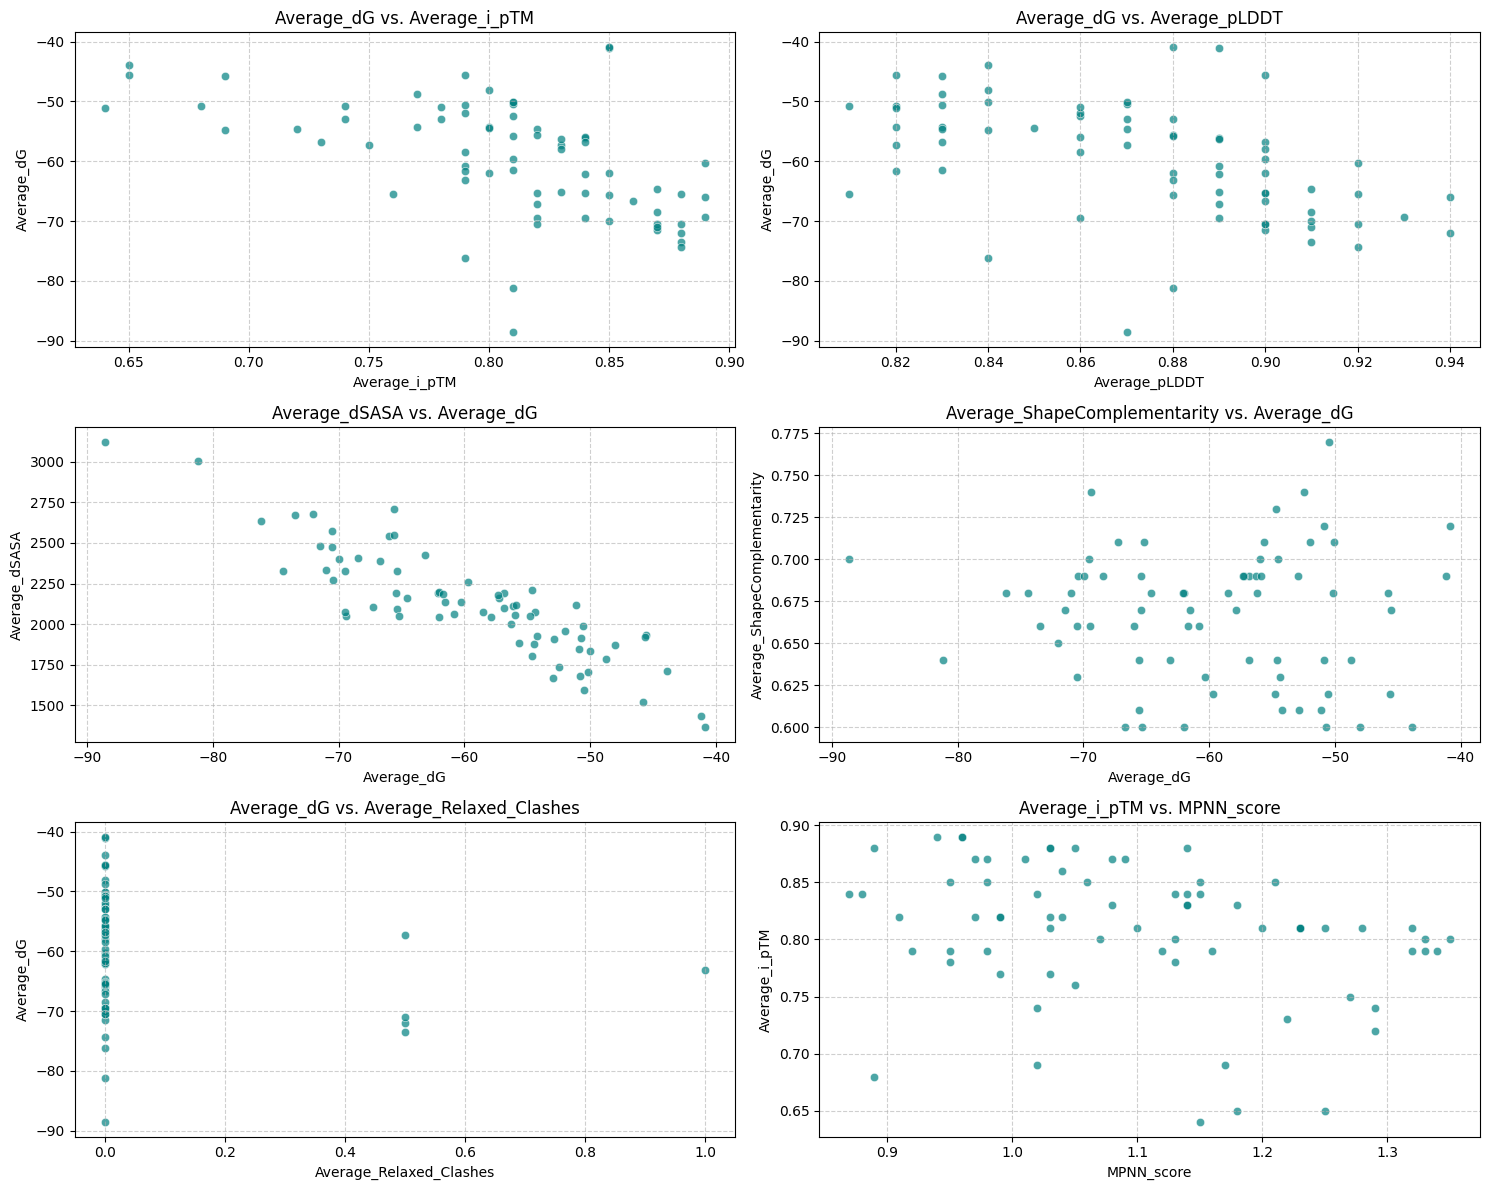

Saved relationship scatter plots to 'plots/relationship_scatter_plots.png'


In [3]:
# --- Scatter Plots for Relationships ---
print("\n--- Generating Relationship Plots (Scatter Plots) ---")

# Define pairs of metrics to visualize relationships
scatter_pairs = [
    ('Average_i_pTM', 'Average_dG'),
    ('Average_pLDDT', 'Average_dG'),
    ('Average_dG', 'Average_dSASA'),
    ('Average_dG', 'Average_ShapeComplementarity'),
    ('Average_Relaxed_Clashes', 'Average_dG'),
    ('MPNN_score', 'Average_i_pTM')
]

plt.figure(figsize=(15, 12))
for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in df.columns and y_col in df.columns:
        plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed
        sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.7, color='teal')
        plt.title(f'{y_col} vs. {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.6)
    else:
        print(f"Warning: One or both columns ('{x_col}', '{y_col}') not found for scatter plot.")

plt.tight_layout()
plot_filename = os.path.join(OUTPUT_DIR, 'relationship_scatter_plots.png')
plt.savefig(plot_filename, dpi=DPI, bbox_inches='tight')
plt.show()
print(f"Saved relationship scatter plots to '{plot_filename}'")

In [4]:
# --- Box Plots for Categorical Comparison (by Protocol) ---
print("\n--- Generating Categorical Comparison Plots (Box Plots) ---")

# Metrics to compare across different protocols
compare_metrics = [
    'Average_dG',
    'Average_i_pTM',
    'Average_Relaxed_Clashes',
    'Average_ShapeComplementarity'
]

if 'Protocol' in df.columns:
    unique_protocols = df['Protocol'].nunique()
    if unique_protocols > 1:
        plt.figure(figsize=(15, 8))
        for i, col in enumerate(compare_metrics):
            if col in df.columns:
                plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
                sns.boxplot(x='Protocol', y=col, data=df, palette='viridis')
                plt.title(f'{col} by Protocol')
                plt.xlabel('Design Protocol')
                plt.ylabel(col)
                plt.xticks(rotation=45, ha='right')
            else:
                print(f"Warning: Column '{col}' not found for box plot.")

        plt.tight_layout()
        plot_filename = os.path.join(OUTPUT_DIR, 'protocol_comparison_box_plots.png')
        plt.savefig(plot_filename, dpi=DPI, bbox_inches='tight')
        plt.show()
        print(f"Saved protocol comparison box plots to '{plot_filename}'")
    else:
        print("Skipping protocol comparison plots: Only one unique protocol found.")
else:
    print("Skipping protocol comparison plots: 'Protocol' column not found in data.")


--- Generating Categorical Comparison Plots (Box Plots) ---
Skipping protocol comparison plots: Only one unique protocol found.



--- Generating Rank Analysis Plots ---


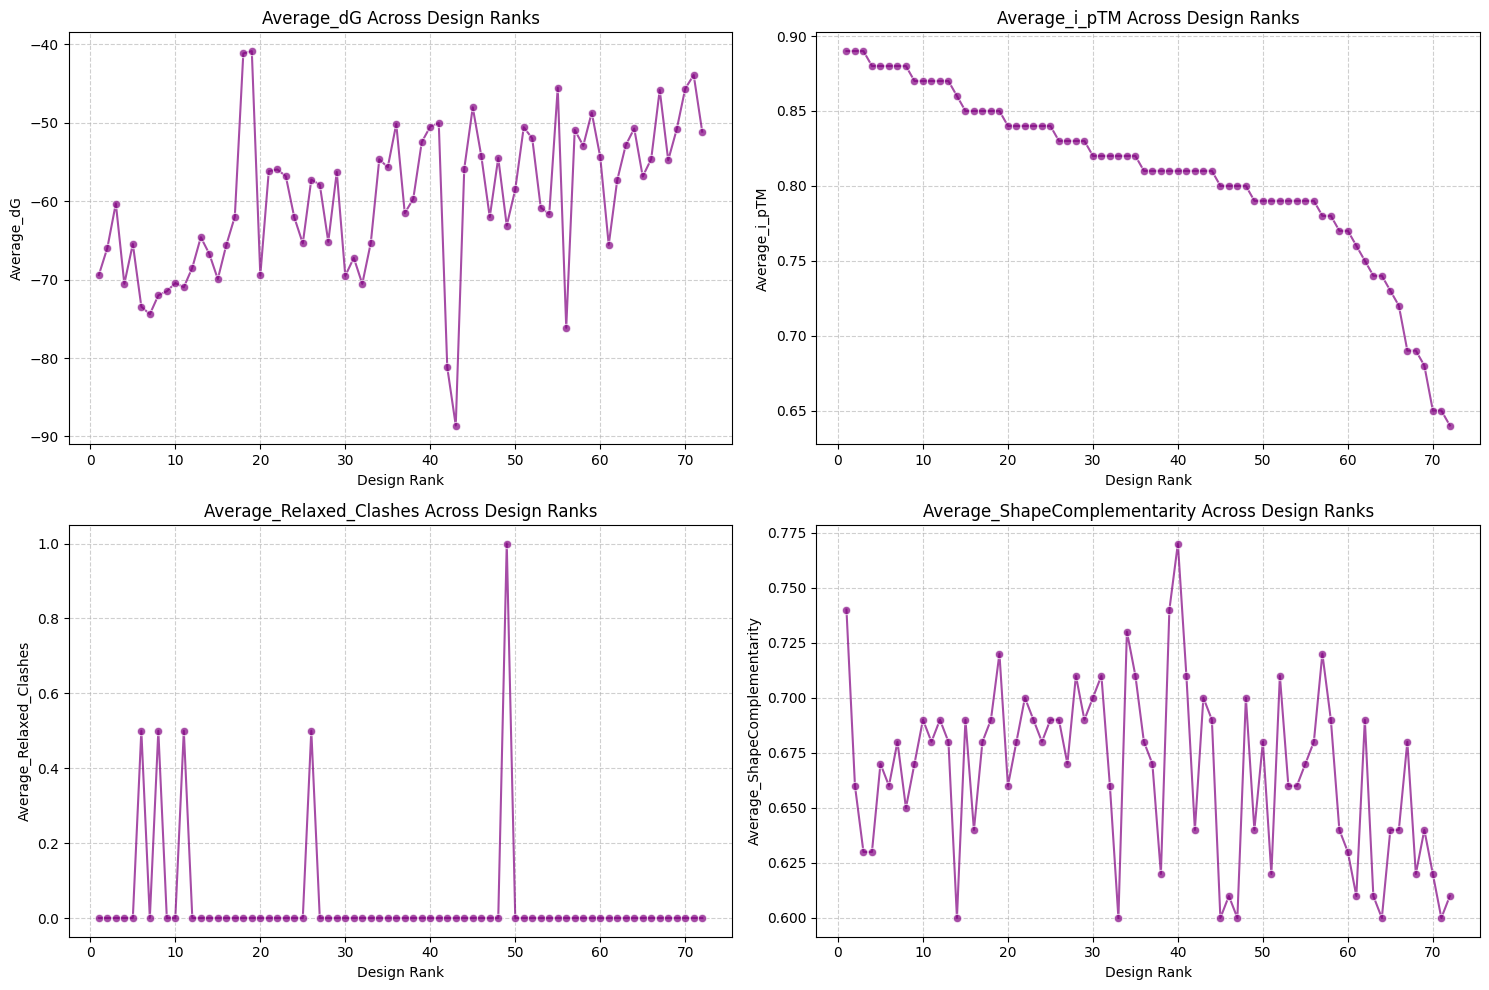

Saved rank analysis plots to 'plots/rank_analysis_plots.png'


In [5]:
# --- Rank Analysis Plots ---
print("\n--- Generating Rank Analysis Plots ---")

# Metrics to plot against 'Rank'
rank_metrics = [
    'Average_dG',
    'Average_i_pTM',
    'Average_Relaxed_Clashes',
    'Average_ShapeComplementarity'
]

if 'Rank' in df.columns:
    # Ensure 'Rank' is sorted for clear trends
    df_sorted_by_rank = df.sort_values(by='Rank')

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(rank_metrics):
        if col in df_sorted_by_rank.columns:
            plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
            sns.lineplot(x='Rank', y=col, data=df_sorted_by_rank, marker='o', color='purple', alpha=0.7)
            plt.title(f'{col} Across Design Ranks')
            plt.xlabel('Design Rank')
            plt.ylabel(col)
            plt.grid(True, linestyle='--', alpha=0.6)
        else:
            print(f"Warning: Column '{col}' not found for rank analysis plot.")

    plt.tight_layout()
    plot_filename = os.path.join(OUTPUT_DIR, 'rank_analysis_plots.png')
    plt.savefig(plot_filename, dpi=DPI, bbox_inches='tight')
    plt.show()
    print(f"Saved rank analysis plots to '{plot_filename}'")
else:
    print("Skipping rank analysis plots: 'Rank' column not found in data.")


--- Generating Correlation Heatmap ---


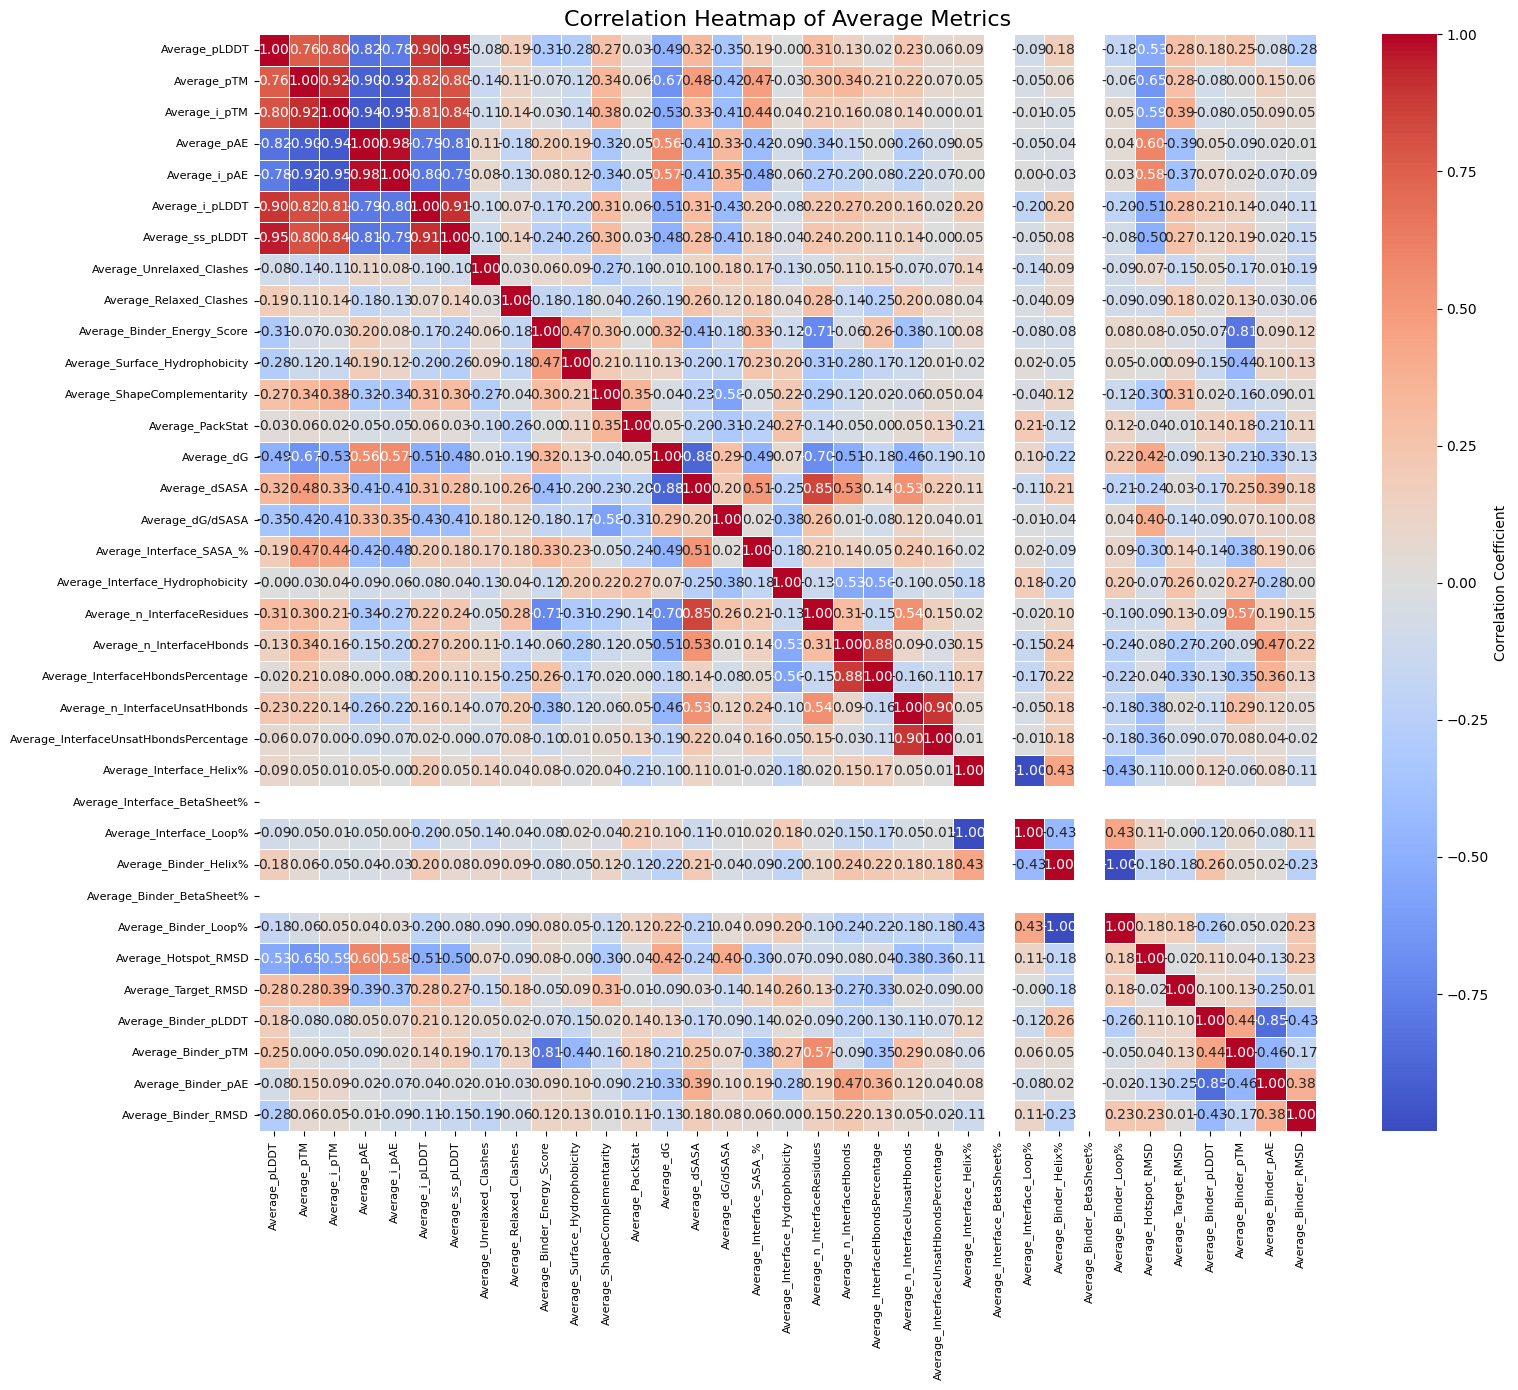

Saved correlation heatmap to 'plots/correlation_heatmap.png'

--- All plots generated and saved! ---


In [6]:
# --- Correlation Heatmap ---
print("\n--- Generating Correlation Heatmap ---")

# Select 'Average' columns for the heatmap
average_cols = [col for col in df.columns if col.startswith('Average_') and df[col].dtype in ['float64', 'int64']]

if len(average_cols) > 1:
    # Calculate the correlation matrix
    corr_matrix = df[average_cols].corr()

    plt.figure(figsize=(16, 14)) # Adjust size for readability
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Heatmap of Average Metrics', fontsize=16)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plot_filename = os.path.join(OUTPUT_DIR, 'correlation_heatmap.png')
    plt.savefig(plot_filename, dpi=DPI, bbox_inches='tight')
    plt.show()
    print(f"Saved correlation heatmap to '{plot_filename}'")
else:
    print("Skipping correlation heatmap: Not enough 'Average_' numerical columns found.")

print("\n--- All plots generated and saved! ---")